In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [3]:
from mpl_toolkits import mplot3d
from matplotlib import cm

In [4]:
def plot_3d(x, y, p, label='$z$', elev=30.0, azim=45.0):
    fig = pyplot.figure(figsize=(8.0, 6.0))
    ax = mplot3d.Axes3D(fig)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel(label)
    X, Y = numpy.meshgrid(x, y)
    ax.plot_surface(X, Y, p, cmap=cm.viridis)
    ax.set_xlim(x[0], x[-1])
    ax.set_ylim(y[0], y[-1])
    ax.view_init(elev=elev, azim=azim)

In [5]:
def laplace_solution(x, y, Lx, Ly):
    X, Y = numpy.meshgrid(x, y)
    p = (numpy.sinh(1.5 * numpy.pi * Y / Ly) /
         numpy.sinh(1.5 * numpy.pi * Ly / Lx) *
         numpy.sin(1.5 * numpy.pi * X / Lx))
    return p

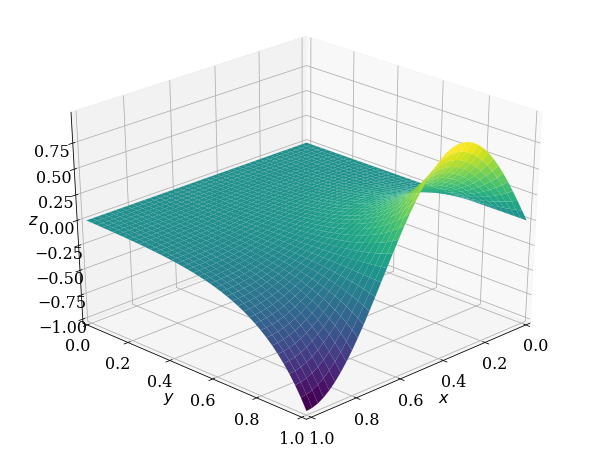

In [6]:
Lx = 1.0
Ly = 1.0
nx = 41
ny = 41

x = numpy.linspace(0.0, Lx, num=nx)
y = numpy.linspace(0.0, Ly, num=ny)

p_exact = laplace_solution(x, y, Lx, Ly)

plot_3d(x, y, p_exact)

In [7]:
def l2_norm(p, p_ref):
    l2_diff = (numpy.sqrt(numpy.sum((p - p_ref)**2)) /
               numpy.sqrt(numpy.sum(p_ref**2)))
    return l2_diff

In [8]:
def laplace_2d_jacobi(p0, maxiter=20000, rtol=1e-6):
    p = p0.copy()
    diff = rtol + 1.0
    ite = 0
    while diff > rtol and ite < maxiter:
        pn = p.copy()
        p[1:-1, 1:-1] = 0.25 * (p[1:-1, :-2] + p[1:-1, 2:] +
                                p[:-2, 1:-1] + p[2:, 1:-1])
        p[1:-1, -1] = p[1:-1, -2]
        diff = l2_norm(p, pn)
        ite += 1
    return p, ite, diff

In [9]:
p0 = numpy.zeros((ny, nx))
p0[-1, :] = numpy.sin(1.5 * numpy.pi * x / Lx)

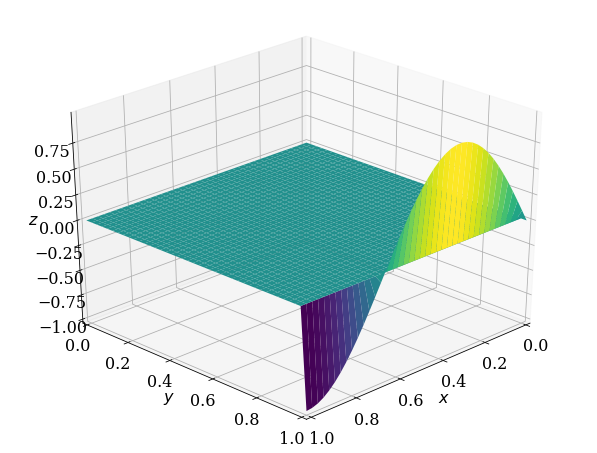

In [10]:
plot_3d(x, y, p0)

In [11]:
p, ites, diff = laplace_2d_jacobi(p0, rtol=1e-8)
print('Jacobi relaxation: {} iterations '.format(ites) +
      'to reach a relative difference of {}'.format(diff))

Jacobi relaxation: 4473 iterations to reach a relative difference of 9.989253685041417e-09


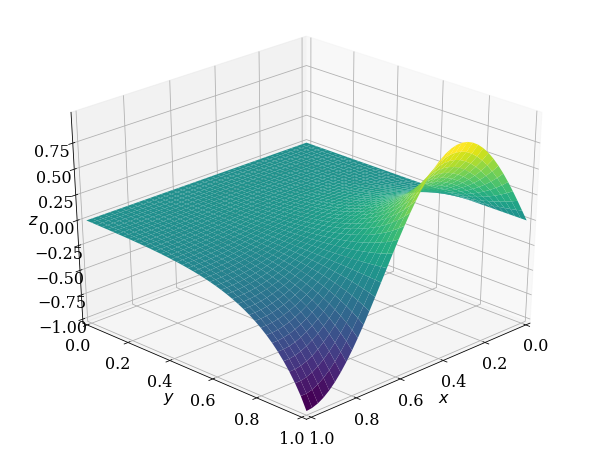

In [12]:
plot_3d(x, y, p)

In [13]:
nx_values = [11, 21, 41, 81]

errors = []

for nx in nx_values:
    ny = nx
    # Create the gridline locations.
    x = numpy.linspace(0.0, Lx, num=nx)
    y = numpy.linspace(0.0, Ly, num=ny)
    # Set the initial conditions.
    p0 = numpy.zeros((ny, nx))
    p0[-1, :] = numpy.sin(1.5 * numpy.pi * x / Lx)
    # Relax the solution.
    # We do not return the number of iterations or
    # the final relative L2-norm of the difference.
    p, _, _ = laplace_2d_jacobi(p0, rtol=1e-8)
    # Compute the analytical solution.
    p_exact = laplace_solution(x, y, Lx, Ly)
    # Compute and record the relative L2-norm of the error.
    errors.append(l2_norm(p, p_exact))

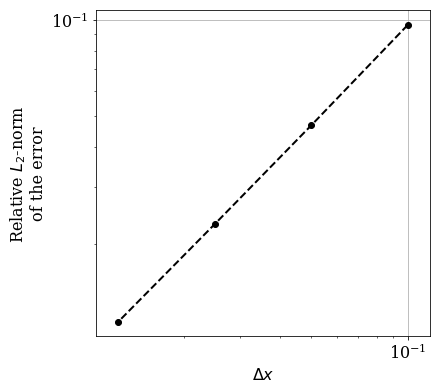

In [14]:
pyplot.figure(figsize=(6.0, 6.0))
pyplot.xlabel(r'$\Delta x$')
pyplot.ylabel('Relative $L_2$-norm\nof the error')
pyplot.grid()
dx_values = Lx / (numpy.array(nx_values) - 1)
pyplot.loglog(dx_values, errors,
              color='black', linestyle='--', linewidth=2, marker='o')
pyplot.axis('equal');

In [15]:
def laplace_2d_jacobi_neumann(p0, maxiter=20000, rtol=1e-6):
    p = p0.copy()
    diff = rtol + 1.0
    ite = 0
    while diff > rtol and ite < maxiter:
        pn = p.copy()
        p[1:-1, 1:-1] = 0.25 * (p[1:-1, :-2] + p[1:-1, 2:] +
                                p[:-2, 1:-1] + p[2:, 1:-1])
        p[1:-1, -1] = 0.25 * (2.0 * pn[1:-1, -2] +
                              pn[2:, -1] + pn[:-2, -1])
        diff = l2_norm(p, pn)
        ite += 1
    return p, ite, diff

In [16]:
nx_values = [11, 21, 41, 81]

errors = []

for nx in nx_values:
    ny = nx
    # Create the gridline locations.
    x = numpy.linspace(0.0, Lx, num=nx)
    y = numpy.linspace(0.0, Ly, num=ny)
    # Set the initial conditions.
    p0 = numpy.zeros((ny, nx))
    p0[-1, :] = numpy.sin(1.5 * numpy.pi * x / Lx)
    # Relax the solution.
    # We do not return the number of iterations or
    # the final relative L2-norm of the difference.
    p, _, _ = laplace_2d_jacobi_neumann(p0, rtol=1e-8)
    # Compute the analytical solution.
    p_exact = laplace_solution(x, y, Lx, Ly)
    # Compute and record the relative L2-norm of the error.
    errors.append(l2_norm(p, p_exact))

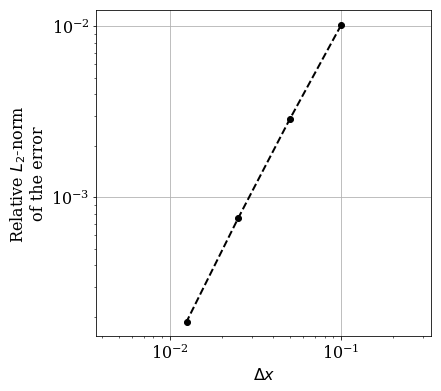

In [17]:
pyplot.figure(figsize=(6.0, 6.0))
pyplot.xlabel(r'$\Delta x$')
pyplot.ylabel('Relative $L_2$-norm\nof the error')
pyplot.grid()
dx_values = Lx / (numpy.array(nx_values) - 1)
pyplot.loglog(dx_values, errors,
              color='black', linestyle='--', linewidth=2, marker='o')
pyplot.axis('equal');

# Poisson equation

In [18]:
nx = 41  # number of points in the x direction
ny = 41  # number of points in the y direction
xmin, xmax = 0.0, 1.0  # domain limits in the x direction
ymin, ymax = -0.5, 0.5  # domain limits in the y direction
Lx = (xmax - xmin)  # domain length in the x direction
Ly = (ymax - ymin)  # domain length in the y direction
dx = Lx / (nx - 1)  # grid spacing in the x direction
dy = Ly / (ny - 1)  # grid spacing in the y direction

# Create the gridline locations.
x = numpy.linspace(xmin, xmax, num=nx)
y = numpy.linspace(ymin, ymax, num=ny)

In [19]:
def poisson_source(x, y, Lx, Ly):
    X, Y = numpy.meshgrid(x, y)
    b = (-2.0 * numpy.pi / Lx * numpy.pi / Ly *
         numpy.sin(numpy.pi * X / Lx) *
         numpy.cos(numpy.pi * Y / Ly))
    return b

In [20]:
def poisson_2d_jacobi(p0, b, dx, dy, maxiter=20000, rtol=1e-6):
    p = p0.copy()
    conv = []  # convergence history
    diff = rtol + 1.0
    ite = 0
    while diff > rtol and ite < maxiter:
        pn = p.copy()
        p[1:-1, 1:-1] = (((pn[1:-1, :-2] + pn[1:-1, 2:]) * dy**2 +
                          (pn[:-2, 1:-1] + pn[2:, 1:-1]) * dx**2 -
                          b[1:-1, 1:-1] * dx**2 * dy**2) /
                         (2.0 * (dx**2 + dy**2)))
        # Dirichlet boundary conditions at automatically enforced.
        # Compute and record the relative L2-norm of the difference.
        diff = l2_norm(p, pn)
        conv.append(diff)
        ite += 1
    return p, ite, conv

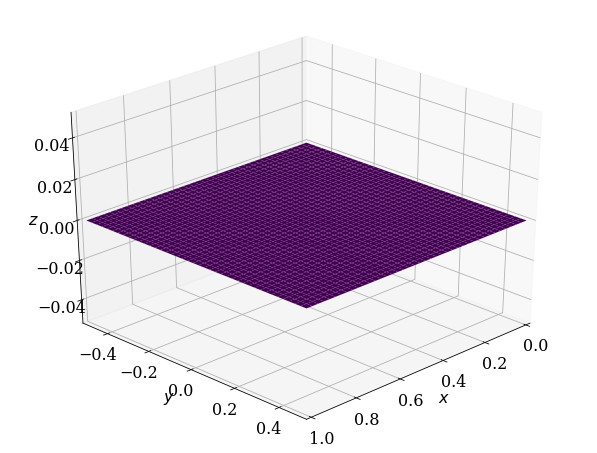

In [21]:
# Set the initial conditions.
p0 = numpy.zeros((ny, nx))

# Compute the source term.
b = poisson_source(x, y, Lx, Ly)

# Plot the initial scalar field.
plot_3d(x, y, p0)

In [22]:
# Compute the solution using Jacobi relaxation method.
p, ites, conv = poisson_2d_jacobi(p0, b, dx, dy, rtol=2e-7)
print('Jacobi relaxation: {} iterations '.format(ites) +
      'to reach a relative difference of {}'.format(conv[-1]))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


Jacobi relaxation: 3125 iterations to reach a relative difference of 1.9958631078740742e-07


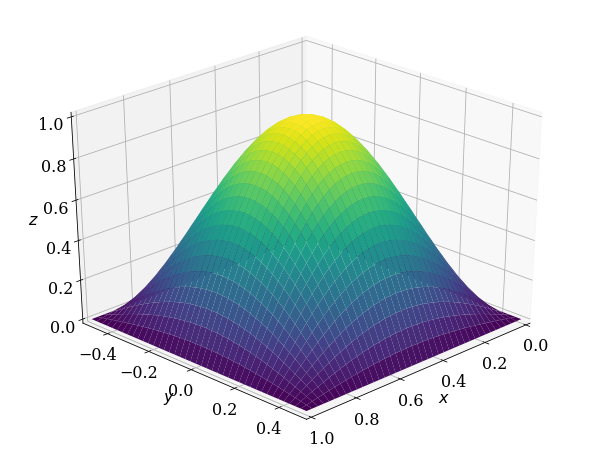

In [23]:
plot_3d(x, y, p)

In [24]:
nx = 128  # number of points in the x direction
ny = 128  # number of points in the y direction
Lx = 5.0  # domain length in the x direction
Ly = 5.0  # domain length in the y direction
dx = Lx / (nx - 1)  # grid spacing in x direction
dy = Ly / (ny - 1)  # grid spacing in y direction

# Create the gridline locations.
x = numpy.linspace(0.0, Lx, num=nx)
y = numpy.linspace(0.0, Ly, num=ny)

# Set the initial conditions.
p0 = numpy.zeros((ny, nx))
p0[-1, :] = numpy.sin(1.5 * numpy.pi * x / Lx)

In [25]:
def laplace_2d_jacobi(p0, maxiter=20000, rtol=1e-6):
    """
    Solves the 2D Laplace equation on a uniform grid
    with equal grid spacing in both directions
    using Jacobi relaxation method.
    
    The exit criterion of the solver is based on the relative L2-norm
    of the solution difference between two consecutive iterations.
    
    Parameters
    ----------
    p0 : numpy.ndarray
        The initial solution as a 2D array of floats.
    maxiter : integer, optional
        Maximum number of iterations to perform;
        default: 20000.
    rtol : float, optional
        Relative tolerance for convergence;
        default: 1e-6.
    
    Returns
    -------
    p : numpy.ndarray
        The solution after relaxation as a 2D array of floats.
    ite : integer
        The number of iterations performed.
    diff : float
        The final relative L2-norm of the difference.
    """
    p = p0.copy()
    diff = rtol + 1.0  # initial difference
    ite = 0  # iteration index
    while diff > rtol and ite < maxiter:
        pn = p.copy()
        # Update the solution at interior points.
        p[1:-1, 1:-1] = 0.25 * (pn[1:-1, :-2] + pn[1:-1, 2:] +
                                pn[:-2, 1:-1] + pn[2:, 1:-1])
        # Apply 2nd-order Neumann condition (zero-gradient)
        # at the right boundary.
        p[1:-1, -1] = 0.25 * (2.0 * pn[1:-1, -2] +
                              pn[2:, -1] + pn[:-2, -1])
        # Compute the relative L2-norm of the difference.
        diff = l2_norm(p, pn)
        ite += 1
    return p, ite, diff

In [26]:
p, ites, diff = laplace_2d_jacobi(p0, maxiter=20000, rtol=1e-8)
print('Jacobi relaxation: {} iterations '.format(ites) +
      'to reach a relative difference of {}'.format(diff))

Jacobi relaxation: 19993 iterations to reach a relative difference of 9.998616841158966e-09


In [27]:
%%timeit
laplace_2d_jacobi(p0, maxiter=20000, rtol=1e-8)

4.28 s ± 9.78 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [28]:
p_exact = laplace_solution(x, y, Lx, Ly)

# Compute the relative L2-norm of the error.
l2_norm(p, p_exact)

6.173551335297434e-05

In [29]:
def laplace_2d_gauss_seidel(p0, maxiter=20000, rtol=1e-6):
    """
    Solves the 2D Laplace equation on a uniform grid
    with equal grid spacing in both directions
    using Gauss-Seidel relaxation method.
    
    The exit criterion of the solver is based on the relative L2-norm
    of the solution difference between two consecutive iterations.
    
    Parameters
    ----------
    p0 : numpy.ndarray
        The initial solution as a 2D array of floats.
    maxiter : integer, optional
        Maximum number of iterations to perform;
        default: 20000.
    rtol : float, optional
        Relative tolerance for convergence;
        default: 1e-6.
    
    Returns
    -------
    p : numpy.ndarray
        The solution after relaxation as a 2D array of floats.
    ite : integer
        The number of iterations performed.
    diff : float
        The final relative L2-norm of the difference.
    """
    ny, nx = p0.shape
    p = p0.copy()
    diff = rtol + 1.0  # initial difference
    ite = 0  # iteration index
    while diff > rtol and ite < maxiter:
        pn = p.copy()
        # Update the solution at interior points.
        for j in range(1, ny - 1):
            for i in range(1, nx - 1):
                p[j, i] = 0.25 * (p[j, i - 1] + p[j, i + 1] +
                                  p[j - 1, i] + p[j + 1, i])
        # Apply 2nd-order Neumann condition (zero-gradient)
        # at the right boundary.
        for j in range(1, ny - 1):
            p[j, -1] = 0.25 * (2.0 * p[j, -2] +
                               p[j - 1, -1] + p[j + 1, -1])
        # Compute the relative L2-norm of the difference.
        diff = l2_norm(p, pn)
        ite += 1
    return p, ite, diff

In [30]:
import numba
from numba import jit

In [31]:
def fib_it(n):
    a, b = 1, 1
    for i in range(n - 2):
        a, b = b, a + b
    return b

In [32]:
%%timeit
fib_it(500000)

3.33 s ± 3.51 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [33]:
@jit
def fib_it(n):
    a, b = 1, 1
    for i in range(n - 2):
        a, b = b, a + b
    return b

In [34]:
%%timeit
fib_it(500000)

320 µs ± 7.48 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [35]:
@jit(nopython=True)
def laplace_2d_jacobi(p0, maxiter=20000, rtol=1e-6):
    """
    Solves the 2D Laplace equation on a uniform grid
    with equal grid spacing in both directions
    using Jacobi relaxation method.
    
    The exit criterion of the solver is based on the relative L2-norm
    of the solution difference between two consecutive iterations.
    
    Parameters
    ----------
    p0 : numpy.ndarray
        The initial solution as a 2D array of floats.
    maxiter : integer, optional
        Maximum number of iterations to perform;
        default: 20000.
    rtol : float, optional
        Relative tolerance for convergence;
        default: 1e-6.
    
    Returns
    -------
    p : numpy.ndarray
        The solution after relaxation as a 2D array of floats.
    ite : integer
        The number of iterations performed.
    conv : list
        The convergence history as a list of floats.
    """
    ny, nx = p0.shape
    p = p0.copy()
    conv = []  # convergence history
    diff = rtol + 1.0  # initial difference
    ite = 0  # iteration index
    while diff > rtol and ite < maxiter:
        pn = p.copy()
        # Update the solution at interior points.
        for j in range(1, ny - 1):
            for i in range(1, nx - 1):
                p[j, i] = 0.25 * (pn[j, i - 1] + pn[j, i + 1] +
                                  pn[j - 1, i] + pn[j + 1, i])
        # Apply 2nd-order Neumann condition (zero-gradient)
        # at the right boundary.
        for j in range(1, ny - 1):
            p[j, -1] = 0.25 * (2.0 * pn[j, -2] +
                               pn[j - 1, -1] + pn[j + 1, -1])
        # Compute the relative L2-norm of the difference.
        diff = numpy.sqrt(numpy.sum((p - pn)**2) / numpy.sum(pn**2))
        conv.append(diff)
        ite += 1
    return p, ite, conv

In [36]:
p, ites, conv_jacobi = laplace_2d_jacobi(p0,
                                         maxiter=20000, rtol=1e-8)
print('Jacobi relaxation: {} iterations '.format(ites) +
      'to reach a relative difference of {}'.format(conv_jacobi[-1]))

Jacobi relaxation: 19993 iterations to reach a relative difference of 9.998616841313522e-09


In [37]:
%%timeit
laplace_2d_jacobi(p0, maxiter=20000, rtol=1e-8)

1.63 s ± 1.17 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
